In [1]:
# Some boring imports
import numpy as np
import pandas as pd
import os
import scipy.io

In [2]:
# Helper functions
def load_filelist():
    
    FILELIST = []
    for dirname, _, filenames in os.walk('/Users/diegodelbarrio/Desktop/Documentos_ETSII/MII/Bruface/1º Cuatri/Project in Electromechanical engineering /MA1_project_code/NASA_dataset_mat'):
        for filename in filenames:

            #filepath = filename
            FILELIST.append(os.path.join(dirname, filename))
    return FILELIST
            
            
def filter_matfiles_list(filelist):
    filelist = [filepath for filepath in filelist if filepath.endswith('.mat')]
    #filelist = [filepath for filepath in filelist if "BatteryAgingARC-FY08Q4" not in filepath] # removing duplicates
    return filelist


def loadmat(filepath):
    return scipy.io.loadmat(filepath, simplify_cells=True)

In [3]:
FILELIST = filter_matfiles_list(load_filelist())
print(FILELIST)

['/Users/diegodelbarrio/Desktop/Documentos_ETSII/MII/Bruface/1º Cuatri/Project in Electromechanical engineering /MA1_project_code/NASA_dataset_mat/B0005.mat', '/Users/diegodelbarrio/Desktop/Documentos_ETSII/MII/Bruface/1º Cuatri/Project in Electromechanical engineering /MA1_project_code/NASA_dataset_mat/B0006.mat', '/Users/diegodelbarrio/Desktop/Documentos_ETSII/MII/Bruface/1º Cuatri/Project in Electromechanical engineering /MA1_project_code/NASA_dataset_mat/B0007.mat']


## Structure of .mat files

- dictionary (loaded mat file)
    - dictionary (e.g. B0005)
        - list (cycle) -> one test per element in the list
            - element of the list = dict = all data for one test of that battery
                - type: operation type, can be charge, discharge or impedance
                - ambient_temperature: ambient temperature (degree C)
                - time: the date and time of the start of the cycle, in MATLAB date vector format
                - data (dict): data structure containing the measurements
                - data fields with key being measured variable, values the actual records (see below)



- for charge the fields are:
    - Voltage_measured: Battery terminal voltage (Volts)
    - Current_measured: Battery output current (Amps)
    - Temperature_measured: Battery temperature (degree C)
    - Current_charge: Current measured at charger (Amps)
    - Voltage_charge: Voltage measured at charger (Volts)
    - Time: Time vector for the cycle (secs)



- for discharge the fields are:
    - Voltage_measured: Battery terminal voltage (Volts)
    - Current_measured: Battery output current (Amps)
    - Temperature_measured: Battery temperature (degree C)
    - Current_load: Current measured at load (Amps)
    - Voltage_load: Voltage measured at load (Volts)
    - Time: Time vector for the cycle (secs)
    - Capacity: Battery capacity (Ahr) for discharge till 2.7V



- for impedance the fields are:
    - Sense_current: Current in sense branch (Amps)
    - Battery_current: Current in battery branch (Amps)
    - Current_ratio: Ratio of the above currents
    - Battery_impedance: Battery impedance (Ohms) computed from raw data
    - Rectified_impedance: Calibrated and smoothed battery impedance (Ohms)
    - Re: Estimated electrolyte resistance (Ohms)
    - Rct: Estimated charge transfer resistance (Ohms)

In [4]:
mat = loadmat("/Users/diegodelbarrio/Desktop/Documentos_ETSII/MII/Bruface/1º Cuatri/Project in Electromechanical engineering /MA1_project_code/NASA_dataset_mat/B0005.mat")

In [6]:
df = pd.DataFrame(data = mat['B0005']['cycle'][0]['data'])

In [7]:
print(df.head(10))

   Voltage_measured  Current_measured  Temperature_measured  Current_charge  \
0          3.873017         -0.001201             24.655358           0.000   
1          3.479394         -4.030268             24.666480          -4.036   
2          4.000588          1.512731             24.675394           1.500   
3          4.012395          1.509063             24.693865           1.500   
4          4.019708          1.511318             24.705069           1.500   
5          4.025409          1.512779             24.718140           1.498   
6          4.030636          1.511838             24.731144           1.500   
7          4.035349          1.510245             24.741290           1.500   
8          4.039716          1.507796             24.759011           1.500   
9          4.043541          1.507322             24.766891           1.500   

   Voltage_charge    Time  
0           0.003   0.000  
1           1.570   2.532  
2           4.726   5.500  
3           4.742 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      789 non-null    float64
 1   Current_measured      789 non-null    float64
 2   Temperature_measured  789 non-null    float64
 3   Current_charge        789 non-null    float64
 4   Voltage_charge        789 non-null    float64
 5   Time                  789 non-null    float64
dtypes: float64(6)
memory usage: 37.1 KB


In [9]:
import matplotlib.pyplot as plt

def plot_test_data(df, profile = "charge"):
    
    if profile == 'charge':
        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_measured, 'b', label='Voltage_measured')
        plt.plot(df.Time, df.Current_measured, 'r', label='Current_measured')
        plt.title("Charge")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_charge, 'b', label = 'Voltage_charge')
        plt.plot(df.Time, df.Current_charge, 'r', label = 'Current_charge')
        plt.legend()
        plt.title("Charge")
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Temperature_measured, 'k', label = 'Temperature_measured')
        plt.legend()
        plt.title("Charge")
        plt.show()

    elif profile == 'discharge':
        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_measured, 'b', label = 'Voltage_measured')
        plt.plot(df.Time, df.Current_measured, 'r', label = 'Current_measured')
        plt.legend()
        plt.title("Discharge")
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_load, 'b', label = 'Voltage_load')
        plt.plot(df.Time, df.Current_load, 'r', label = 'Current_load')
        plt.legend()
        plt.title("Discharge")
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Temperature_measured, 'k', label = 'Temperature_measured')
        plt.legend()
        plt.title("Discharge")
        plt.show()

    elif profile == 'impedance':
        pass
    
    else:
        print('No cycle recognized')

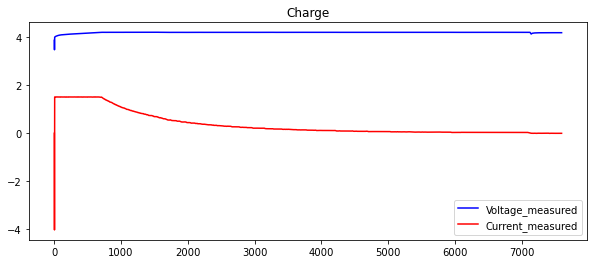

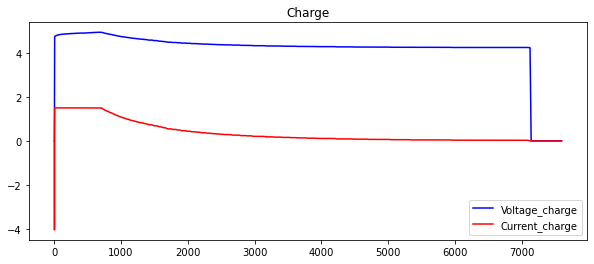

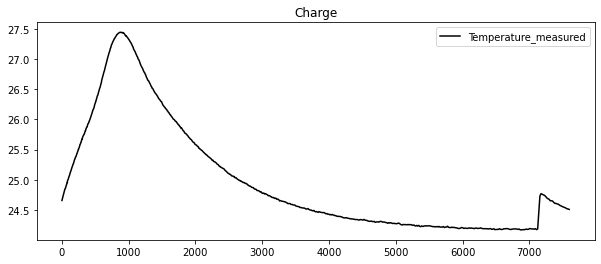

In [10]:
plot_test_data(df)

In [14]:
df = pd.DataFrame(data=mat['B0005']['cycle'][1]['data'])
df.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,Capacity
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487


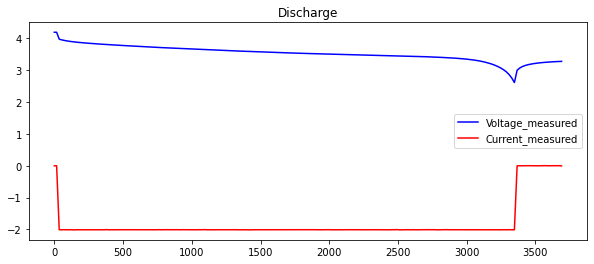

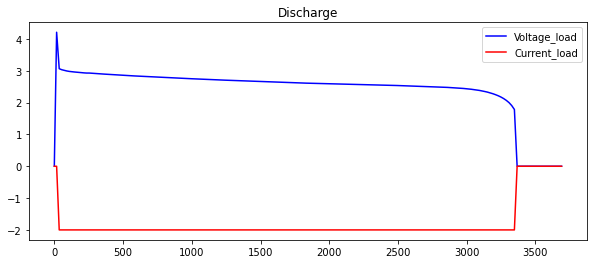

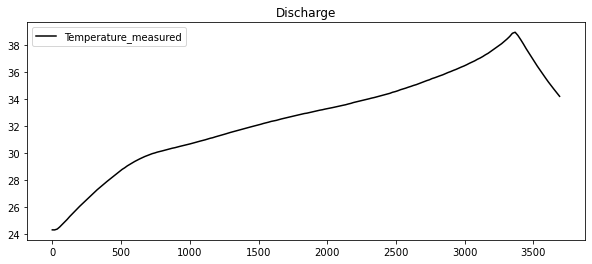

In [12]:
plot_test_data(df, profile='discharge')

In [4]:
def process_data_dict(data_dict):
    """ Creates two dictionaries:
    - ndict: new dictionary with the test data to build a corresponding dataframe
    - metadata_dict: anything that doesn't fit in ndict ('Capacity' is just a float)
    """
    
    ndict = {}
    metadata_dict = {}
    for k, v in data_dict.items():

        if k not in ['Capacity', 'Re', 'Rct']:
            ndict[k]=v

        elif k == 'Capacity':
            metadata_dict[k]=v

        elif k == 'Re':
            metadata_dict[k]=v

        elif k == 'Rct':
            metadata_dict[k]=v

        else:
            print("c'est la merde")
    
    return ndict, metadata_dict


def fill_metadata_row(metadata, test_type, test_start_time, test_temperature, battery_name, test_id, uid, filename, capacity, re, rct):

    tmp = pd.DataFrame(data=[test_type, test_start_time, test_temperature, battery_name, test_id, uid, filename, capacity, re, rct])
    tmp = tmp.transpose()
    tmp.columns = metadata.columns
    metadata = pd.concat((metadata, tmp), axis=0)
    return metadata


def extract_more_metadata(metadata_dict):
    
    if 'Capacity' in metadata_dict.keys():
        capacity = metadata_dict['Capacity']

    else:
        capacity = np.nan
        
    if 'Re' in metadata_dict.keys():
        
        re = metadata_dict['Re']
    else:
        re = np.nan
        
    if 'Rct' in metadata_dict.keys():
        rct = metadata_dict['Rct']

    else:
        rct = np.nan
    
    return capacity, re, rct

In [5]:
metadata = pd.DataFrame(data = None, columns = ['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id', 'uid', 'filename', 'Capacity', 'Re', 'Rct'])
battery_list = [item.split('/')[-1].split('.')[0] for item in FILELIST]

In [6]:
# We create a tmp directory in which we will save all CSV files
CWD = os.getcwd()
os.listdir(CWD)
directory = "tmp"
path = os.path.join(CWD, directory)
if not os.path.exists(path):
    os.mkdir(path)

In [7]:
os.listdir(CWD) # we check that tmp exists now

['mat_to_csv.ipynb', 'README.txt', 'tmp']

In [8]:
uid = 0

for battery_name, mat_filepath in zip(battery_list, FILELIST):
    
    mat_data = scipy.io.loadmat(mat_filepath, simplify_cells=True)
    print(mat_filepath[-10:],"-->", battery_name)
    test_list = mat_data[battery_name]['cycle']
    
    for test_id in range(len(test_list)):
        
        uid += 1
        filename = str(uid).zfill(5)+'.csv'
        filepath = './tmp/' + filename

        # Extract the specific test data and save it as CSV! 
        ndict, metadata_dict = process_data_dict(test_list[test_id]['data'])
        test_df = pd.DataFrame.from_dict(ndict, orient='index')
        test_df = test_df.transpose()

        test_df.to_csv(filepath, index=False)
                
        # Add test information to the metadata
        test_type = test_list[test_id]['type']
        test_start_time = test_list[test_id]['time']
        test_temperature = test_list[test_id]['ambient_temperature']
        
        capacity, re, rct = extract_more_metadata(metadata_dict)
        metadata = fill_metadata_row(metadata, test_type, test_start_time, test_temperature, battery_name, test_id, uid, filename, capacity, re, rct)
        

/B0005.mat --> B0005
/B0006.mat --> B0006
/B0007.mat --> B0007


In [9]:
metadata.to_csv('metadata.csv', index=False)

In [10]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 0 to 0
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 1848 non-null   object
 1   start_time           1848 non-null   object
 2   ambient_temperature  1848 non-null   object
 3   battery_id           1848 non-null   object
 4   test_id              1848 non-null   object
 5   uid                  1848 non-null   object
 6   filename             1848 non-null   object
 7   Capacity             504 non-null    object
 8   Re                   834 non-null    object
 9   Rct                  834 non-null    object
dtypes: object(10)
memory usage: 158.8+ KB


In [11]:
import shutil

shutil.make_archive('data', 'zip', 'tmp')

'/Users/diegodelbarrio/Desktop/Documentos_ETSII/MII/Bruface/1º Cuatri/Project in Electromechanical engineering /GNN_project/NASA_dataset/code/data.zip'